In [56]:
import geopandas as gpd
import json
import pandas as pd
import requests
from datetime import datetime
from pytz import timezone
from shapely.geometry import LineString, Point
from shapely.wkt import dumps

In [30]:
with open("../.config/connection_strings.json") as f:
    connections = json.load(f)

In [31]:
session = requests.Session()
res = session.get(connections["waze"])

In [47]:
alerts = gpd.GeoDataFrame(res.json()['alerts'])

In [48]:
alerts['pubMillis'] = alerts.pubMillis.map(
    lambda x: datetime.fromtimestamp(x / 1000).astimezone(timezone('US/Pacific')))
alerts['pubMillis'] = alerts.pubMillis.dt.round('L')
alerts['pubMillis'] = alerts.pubMillis.map(lambda x: x.strftime('%Y-%m-%d %H:%M:%S.%f'))
alerts['pubMillis'] = alerts.pubMillis.map(lambda x: x[:-3])

alerts['location'] = alerts.location.map(lambda x: [x['x'], x['y']])
alerts['location'] = alerts.location.apply(Point)
alerts['location'] = alerts.location.map(dumps)

In [49]:
alerts.head()

,city,confidence,country,location,magvar,nThumbsUp,pubMillis,reliability,reportDescription,reportRating,roadType,street,subtype,type,uuid
0,"Portland, OR",1,US,POINT (-122.6968609999999984 45.5365960000000030),0,0,2019-07-23 09:55:28.000,9,NaN,0,NaN,to Thurman St,ROAD_CLOSED_EVENT,ROAD_CLOSED,a8f579c0-7cd0-39fe-8947-86e823030b56
1,"Portland, OR",5,US,POINT (-122.6740586757660054 45.5144368636243115),312,0,2019-03-15 15:03:15.000,10,,0,4.0,NaN,HAZARD_ON_ROAD_LANE_CLOSED,WEATHERHAZARD,4c588935-1a6c-3614-9127-aa15a9ce1efa
2,"Portland, OR",0,US,POINT (-122.6607939999999957 45.5158059999999978),0,0,2019-07-31 04:59:42.000,7,,0,NaN,SE Yamhill St,ROAD_CLOSED_EVENT,ROAD_CLOSED,3768fd72-4b57-3976-8818-82e797aad77d
3,"Portland, OR",1,US,POINT (-122.6597699999999946 45.5158079999999998),0,0,2019-07-31 04:59:34.000,9,,0,NaN,SE Yamhill St,ROAD_CLOSED_EVENT,ROAD_CLOSED,c8317d98-e726-351b-bcd1-09c8dd970b58
4,"Portland, OR",3,US,POINT (-122.6617669999999976 45.5222260000000034),0,0,2019-05-21 13:02:22.000,10,,0,NaN,SE Ankeny St,ROAD_CLOSED_EVENT,ROAD_CLOSED,d1fd4526-ebd7-3d91-90cc-bb0f040935db


In [62]:
jams = gpd.GeoDataFrame(res.json()['jams'])

In [63]:
jams['pubMillis'] = jams.pubMillis.map(
    lambda x: datetime.fromtimestamp(x / 1000).astimezone(timezone('US/Pacific')))
jams['pubMillis'] = jams.pubMillis.dt.round('L')
jams['pubMillis'] = jams.pubMillis.map(
    lambda x: x.strftime('%Y-%m-%d %H:%M:%S.%f'))

jams['line'] = jams.line.map(lambda l: [[x['x'], x['y']] for x in l])
jams['line'] = jams.line.apply(LineString)
jams['line'] = jams.line.apply(dumps)

In [64]:
jams.head()

,blockingAlertUuid,city,country,delay,endNode,id,length,level,line,pubMillis,roadType,segments,speed,speedKMH,street,turnType,type,uuid
0,NaN,"Portland, OR",US,64,SW 31st Ave,1236377989,1107,2,LINESTRING (-122.7275029999999987 45.467485000...,2019-08-07 12:41:56.643000,7,"[{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}]",8.091667,29.13,SW Multnomah Blvd,NONE,NONE,1236377989
1,NaN,"Portland, OR",US,313,to I-405 N / Seattle,1240642144,4295,2,LINESTRING (-122.7489659999999958 45.506607000...,2019-08-07 06:02:17.561000,3,"[{}, {}, {}, {}, {}, {}]",8.900000,32.04,US-26 E,NONE,NONE,1240642144
2,a8f579c0-7cd0-39fe-8947-86e823030b56,"Portland, OR",US,-1,NW 21st Ave,1233684392,176,5,LINESTRING (-122.6968609999999984 45.536596000...,2019-08-07 02:19:08.531000,4,[{}],0.000000,0.00,to Thurman St,NONE,NONE,1233684392
3,NaN,"Portland, OR",US,90,SE Tacoma St,1238252188,602,3,LINESTRING (-122.6530249999999995 45.470063000...,2019-08-07 12:40:41.463000,2,"[{}, {}, {}, {}, {}, {}, {}, {}, {}, {}, {}]",4.066667,14.64,SE 13th Ave,NONE,NONE,1238252188
4,NaN,"Portland, OR",US,103,SW Barbur Blvd,1232660500,298,3,LINESTRING (-122.6857179999999943 45.468156999...,2019-08-07 12:33:12.730000,7,"[{}, {}]",2.308333,8.31,SW Terwilliger Blvd,NONE,NONE,1232660500


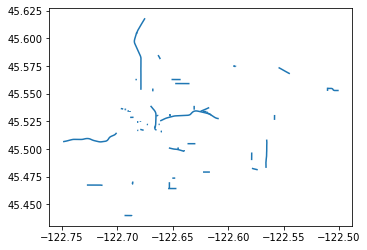

In [61]:
jams.set_geometry('line').plot()

In [12]:
gpd.GeoDataFrame(res.json()['irregularities'])

,alerts,alertsCount,city,country,delaySeconds,detectionDate,detectionDateMillis,driversCount,endNode,highway,...,nThumbsUp,regularSpeed,seconds,severity,speed,street,trend,type,updateDate,updateDateMillis
0,"[{'country': 'US', 'nThumbsUp': 0, 'city': 'Po...",22,"Portland, OR",US,1376,Tue Aug 6 22:21:15 +0000 2019,1565130075460,295,Exit 24B: Airport Way E,True,...,1,31.14,1920,5,27.46,I-205 N,0,Small,Tue Aug 6 22:41:51 +0000 2019,1565131311117
1,"[{'country': 'US', 'nThumbsUp': 0, 'city': 'Po...",1,"Portland, OR",US,752,Tue Aug 6 22:20:00 +0000 2019,1565130000532,26,NE Martin Luther King Jr Blvd,True,...,0,7.88,828,5,5.18,N Marine Dr,0,Small,Tue Aug 6 22:41:51 +0000 2019,1565131311119
